# TUGAS PRAKTIKUM 1

In [ ]:
df_mall = pd.read_csv('Mall_Customers.csv')
display(df_mall.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X_mall = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X_mall.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


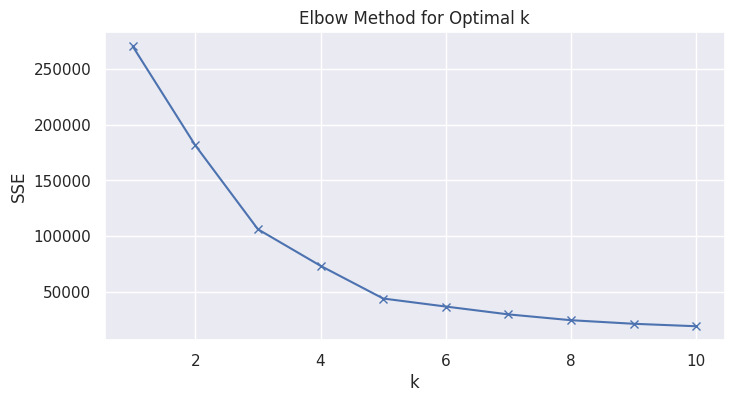

In [ ]:
sse = []
K = range(1, 11) # Iterate from 1 to 10 as instructed
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=0, n_init=10) # Added random_state and n_init for reproducibility
    kmeans_model.fit(X_mall)
    sse.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
# Based on the elbow plot, the optimal number of clusters appears to be 5.
optimal_k = 5

# Instantiate KMeans with the optimal k
kmeans_mall = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)

# Fit the model to the data
kmeans_mall.fit(X_mall)

# Get the cluster labels
y_kmeans_mall = kmeans_mall.predict(X_mall)

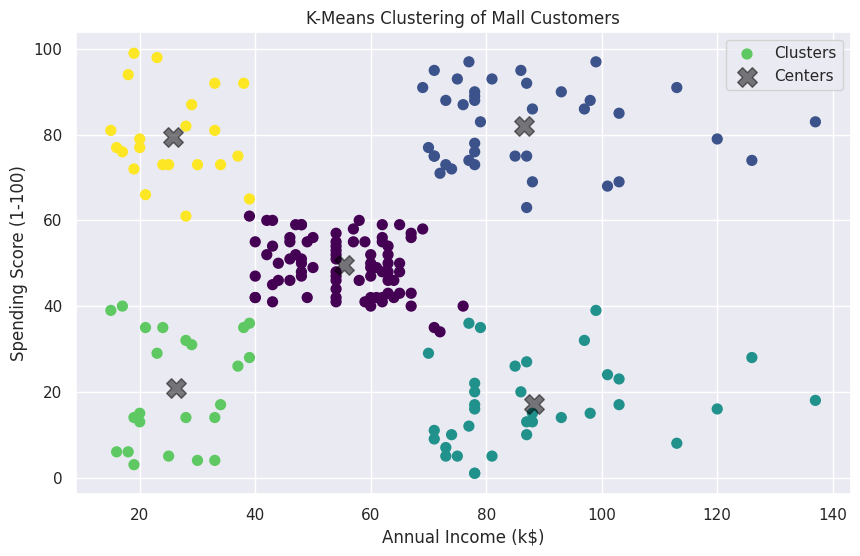

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_mall.iloc[:, 0], X_mall.iloc[:, 1], c=y_kmeans_mall, s=50, cmap='viridis', label='Clusters')

centers = kmeans_mall.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='X', label='Centers')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.legend()
plt.show()